# Team Members: Kshama Kumar, Yong Long Tan, Vincent Marklynn

### Importing libraries

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Importing data

In [2]:
campaign_desc = pd.read_csv('data/campaign_desc.csv') 
campaign_table = pd.read_csv('data/campaign_table.csv')
causal_data = pd.read_csv('data/causal_data.csv') 
coupon_redempt = pd.read_csv('data/coupon_redempt.csv') 
coupon = pd.read_csv('data/coupon.csv') 
hh_demographic = pd.read_csv('data/hh_demographic.csv') 
product = pd.read_csv('data/product.csv') 
transaction_data = pd.read_csv('data/transaction_data.csv') 

### Analysing data (Table-wise)

As the data is contained in various tables, first we have a look at the what data we have in the individual tables, check for null values and then join certain tables using a common field as the key so that we can make better predictions.

The tables that we will be performing EDA on are the Data Tables, specifically
HH_DEMOGRAPHIC and TRANSACTION_DATA. The other tables are look up tables
which will not yield any insights.

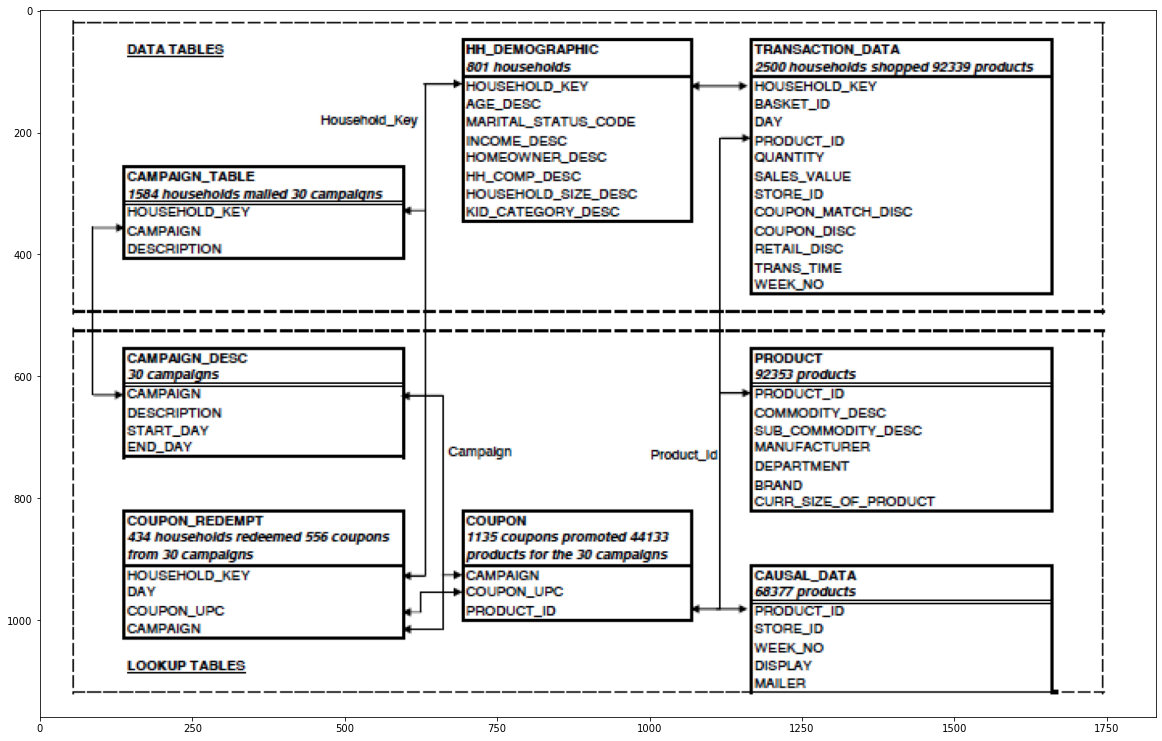

In [3]:
erd = Image.open("ERD.png")
plt.figure(figsize=(20, 20))
plt.imshow(erd)

### Campaign Description

In [4]:
campaign_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [5]:
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


Basic info about the columns above:
- DESCRIPTION: Type of campaign (TypeA, TypeB or TypeC)
- CAMPAIGN   : Uniquely identifies each campaign. Ranges 1-30
- START_DAY  : Start date of campaign
- END_DAY    : End date of campaign

In [6]:
campaign_table.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [7]:
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


Basic info about the columns above:
- DESCRIPTION: Type of campaign (TypeA, TypeB or TypeC)
- HOUSEHOLD  : Uniquely identifies each household
- CAMPAIGN   : Uniquely identifies each campaign. Ranges 1-30

In [8]:
campaigndata = pd.merge(campaign_desc, campaign_table, how="inner", on=["CAMPAIGN"])

In [9]:
campaigndata.head()

,DESCRIPTION_x,CAMPAIGN,START_DAY,END_DAY,DESCRIPTION_y,household_key
0,TypeB,24,659,719,TypeB,31
1,TypeB,24,659,719,TypeB,149
2,TypeB,24,659,719,TypeB,332
3,TypeB,24,659,719,TypeB,371
4,TypeB,24,659,719,TypeB,518


In [10]:
campaigndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7208 entries, 0 to 7207
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION_x  7208 non-null   object
 1   CAMPAIGN       7208 non-null   int64 
 2   START_DAY      7208 non-null   int64 
 3   END_DAY        7208 non-null   int64 
 4   DESCRIPTION_y  7208 non-null   object
 5   household_key  7208 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 394.2+ KB


### Product and Coupon information

In [11]:
causal_data.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
0,26190,286,70,0,A
1,26190,288,70,0,A
2,26190,289,70,0,A
3,26190,292,70,0,A
4,26190,293,70,0,A


In [12]:
causal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB


Basic info about the columns above:
- PRODUCT_ID: Uniquely identifies each product
- STORE_ID  : Identifies unique stores
- WEEK_NO   : Week of the transaction
- display   : Display location
- mailer    : Mailer location

In [13]:
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [14]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


Basic info about the columns above:
- PRODUCT_ID          : Uniquely identifies each product
- MANUFACTURER        : Code that links product with same manufacturer together
- DEPARTMENT          : Groups similar product together
- BRAND               : Indicates Private or National label brand
- COMMODITY_DESC      : Groups similar product together at a lower level
- SUB_COMMODITY_DESC  : Groups similar product together at the lower level
- CURR_SIZE_OF_PRODUCT: Indicates package size (not available for all products)

In [15]:
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [16]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


Basic info about the columns above:
- COUPON_UPC: Uniquely identifies each coupon (unique to household and campaign)
- PRODUCT_ID: Uniquely identifies each product
- CAMPAIGN  : Uniquely identifies each campaign. Ranges 1-30

In [17]:
storeproducts = pd.merge(causal_data,product, how="inner", on=["PRODUCT_ID"])
storeCoupons = pd.merge(storeproducts,coupon, how="inner", on=["PRODUCT_ID"])

In [18]:
storeproducts.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
1,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
2,26190,289,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
3,26190,292,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26190,293,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


In [19]:
storeproducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36786524 entries, 0 to 36786523
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   PRODUCT_ID            int64 
 1   STORE_ID              int64 
 2   WEEK_NO               int64 
 3   display               object
 4   mailer                object
 5   MANUFACTURER          int64 
 6   DEPARTMENT            object
 7   BRAND                 object
 8   COMMODITY_DESC        object
 9   SUB_COMMODITY_DESC    object
 10  CURR_SIZE_OF_PRODUCT  object
dtypes: int64(4), object(7)
memory usage: 3.3+ GB


In [20]:
storeCoupons.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089133,13
1,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,51111070150,26
2,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089038,8
3,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089133,13
4,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,51111070150,26


In [21]:
storeCoupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84456055 entries, 0 to 84456054
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   PRODUCT_ID            int64 
 1   STORE_ID              int64 
 2   WEEK_NO               int64 
 3   display               object
 4   mailer                object
 5   MANUFACTURER          int64 
 6   DEPARTMENT            object
 7   BRAND                 object
 8   COMMODITY_DESC        object
 9   SUB_COMMODITY_DESC    object
 10  CURR_SIZE_OF_PRODUCT  object
 11  COUPON_UPC            int64 
 12  CAMPAIGN              int64 
dtypes: int64(6), object(7)
memory usage: 8.8+ GB


### Households and Coupon redemptions

In [22]:
coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [23]:
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


Basic info about the columns above:
- household_key: Uniquely identifies each household
- DAY          : Day when transaction occurred
- COUPON_UPC   : Uniquely identifies each coupon (unique to household and campaign)
- CAMPAIGN     : Uniquely identifies each campaign

In [24]:
hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [25]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


Basic info about the columns above:
- AGE_DESC           : Estimated age range
- MARITAL_STATUS_CODE: Marital Status (A - Married, B - Single, U - Unknown)
- INCOME_DESC        : Household income
- HOMEOWNER_DESC     : Homeowner, renter, etc.
- HH_COMP_DESC       : Household composition
- HOUSEHOLD_SIZE_DESC: Size of household up to 5+
- KID_CATEGORY_DESC  : Number of children present up to 3+
- household_key      : Uniquely identifies each household

In [26]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [27]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


Basic info about the columns above:
- household_key      : Uniquely identifies each household
- BASKET_ID          : Uniquely identifies a purchase occasion
- DAY                : Day when transaction occurred
- PRODUCT_ID         : Uniquely identifies each product
- QUANTITY           : Number of the products purchased during the trip
- SALES_VALUE        : Amount of dollars retailer receives from sale
- STORE_ID           : Identifies unique stores
- RETAIL_DISC        : Discount applied due to retailer's loyalty card program
- TRANS_TIME         : Time of day when the transaction. Ranges 1-102
- WEEK_NO            : Week of the transaction. Ranges 1-102
- COUPON_DISC        : Discount applied due to manufacturer coupon
- COUPON_MATCH_DISC  : Discount applied due to retailer's match of manufacturer coupon

In [28]:
couponRedemptions = pd.merge(coupon_redempt,hh_demographic, how="inner", on=["household_key"])

In [29]:
couponRedemptions.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,1,421,10000085364,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
1,1,421,51700010076,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
2,1,427,54200000033,8,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
3,1,597,10000085476,18,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
4,1,597,54200029176,18,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown


In [30]:
couponRedemptions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 0 to 1855
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   household_key        1856 non-null   int64 
 1   DAY                  1856 non-null   int64 
 2   COUPON_UPC           1856 non-null   int64 
 3   CAMPAIGN             1856 non-null   int64 
 4   AGE_DESC             1856 non-null   object
 5   MARITAL_STATUS_CODE  1856 non-null   object
 6   INCOME_DESC          1856 non-null   object
 7   HOMEOWNER_DESC       1856 non-null   object
 8   HH_COMP_DESC         1856 non-null   object
 9   HOUSEHOLD_SIZE_DESC  1856 non-null   object
 10  KID_CATEGORY_DESC    1856 non-null   object
dtypes: int64(4), object(7)
memory usage: 174.0+ KB


### Information on all of the Dataframes :
- campaign_desc - Campaign description, when it started , ended and type
- campaign_table - Household related to the campaign
- campaigndata - Inner join merge between the above 2.
- causal_data - Info on products and which store has them
- product - Product information
- coupon - Coupons related to each product
- storeproducts - Inner join merge between causal data and product
- storeCoupons - Inner join merge between storeproducts and coupon
- coupon_redempt - which household has which coupon
- hh_demographic - As the name says, household demographics
- transaction_data - Transaction history of each household
- couponRedemptions - Inner join merge of coupon redemptions and hh data
- hhTransactions - Probably redundant but inner join merge between couponRedemptions and   transaction_data

### Visualizations And Analysis

#### Mean Median and Standard Deviation
For the Mean Median and SD, we will be examining the transaction data table.


In [31]:
transaction_data[["SALES_VALUE", "QUANTITY", "RETAIL_DISC"]].describe()

,SALES_VALUE,QUANTITY,RETAIL_DISC
count,2.595732e+06,2.595732e+06,2.595732e+06
mean,3.104120e+00,1.004286e+02,-5.387054e-01
std,4.182274e+00,1.153436e+03,1.249191e+00
min,0.000000e+00,0.000000e+00,-1.800000e+02
25%,1.290000e+00,1.000000e+00,-6.900000e-01
50%,2.000000e+00,1.000000e+00,-1.000000e-02
75%,3.490000e+00,1.000000e+00,0.000000e+00
max,8.400000e+02,8.963800e+04,3.990000e+00


The maximum quantity of 896380 does not make sense. This requires further
investigation.

In [32]:
transaction_data[transaction_data["QUANTITY"] == 89638]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
1750942,630,34749153595,503,6534178,89638,250.0,384,-13.45,1927,73,0.0,0.0


This is very suspicious because purchasing 89638 quantity of something
will logically result in a SALES_VALUE of greater than 250. We will drop
rows where the QUANTITY is greater than the median.

In [33]:
transaction_data = transaction_data[transaction_data["QUANTITY"] <= 100]

In [34]:
transaction_data[["SALES_VALUE", "QUANTITY", "RETAIL_DISC"]].describe()

,SALES_VALUE,QUANTITY,RETAIL_DISC
count,2.572596e+06,2.572596e+06,2.572596e+06
mean,2.897122e+00,1.304541e+00,-5.356659e-01
std,3.376942e+00,9.304023e-01,1.251960e+00
min,0.000000e+00,0.000000e+00,-1.800000e+02
25%,1.260000e+00,1.000000e+00,-6.600000e-01
50%,2.000000e+00,1.000000e+00,0.000000e+00
75%,3.390000e+00,1.000000e+00,0.000000e+00
max,8.400000e+02,9.800000e+01,3.990000e+00


In [35]:
trans_data_baskets_hh_key = pd.DataFrame(transaction_data.groupby(['household_key', 'BASKET_ID']).sum()).drop(['DAY', 'PRODUCT_ID', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1)
trans_data_baskets_hh_key = trans_data_baskets_hh_key.merge(transaction_data.drop(['QUANTITY','SALES_VALUE', 'PRODUCT_ID', 'RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1), on="BASKET_ID").drop_duplicates(subset=['BASKET_ID'])

hh_transactions = trans_data_baskets_hh_key.merge(hh_demographic, on='household_key')

In [36]:
# check null values
hh_transactions.isnull().sum()

BASKET_ID              0
QUANTITY               0
SALES_VALUE            0
household_key          0
DAY                    0
STORE_ID               0
TRANS_TIME             0
WEEK_NO                0
AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
dtype: int64

#### The different age groups in the dataset

In [37]:
# Get the unique age_groups in AGE_DSC
age_groups = sorted(list(hh_transactions.AGE_DESC.unique()))
print("The different age_group buckets in the dataset are " + str(age_groups) + ".")

# Create empty list of to store dataframes
age_group_spending_dfs = []

# append each individual age group dataframe to the list
for group in age_groups:
    age_group_spending_dfs.append(hh_transactions[hh_transactions['AGE_DESC'] == group])
    
    
# Group and Name the Transaction Spending DataFrames by Age Group
age_19_24 = age_group_spending_dfs[0]
age_25_34 = age_group_spending_dfs[1]
age_35_44 = age_group_spending_dfs[2]
age_45_54 = age_group_spending_dfs[3]
age_55_64 = age_group_spending_dfs[4]
age_65 = age_group_spending_dfs[5]

The different age_group buckets in the dataset are ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'].


#### The different income groups in the dataset

In [38]:
#  Get the unique age_groups in INCOME_DESC
income_groups = sorted(list(hh_transactions.INCOME_DESC.unique()))
print("The different income buckets in the dataset are " + str(income_groups) + ".")

# Create empty list of to store dataframes
income_group_spending_dfs = []

# append each individual age group dataframe to the list
for group in income_groups:
    income_group_spending_dfs.append(hh_transactions[hh_transactions['INCOME_DESC'] == group])
    

#  Group and Name the Transaction Spending DataFrames by Income Group
inc_100_124K = income_group_spending_dfs[0]
inc_125_149K = income_group_spending_dfs[1]
inc_15_24K = income_group_spending_dfs[2]
inc_150_174K = income_group_spending_dfs[3]
inc_175_199K = income_group_spending_dfs[4]
inc_200_249K = income_group_spending_dfs[5]
inc_25_34K = income_group_spending_dfs[6]
inc_250K = income_group_spending_dfs[7]
inc_35_49K = income_group_spending_dfs[8]
inc_50_74K = income_group_spending_dfs[9]
inc_75_99K = income_group_spending_dfs[10]
inc_Under_15K = income_group_spending_dfs[11]

The different income buckets in the dataset are ['100-124K', '125-149K', '15-24K', '150-174K', '175-199K', '200-249K', '25-34K', '250K+', '35-49K', '50-74K', '75-99K', 'Under 15K'].


#### Average Transaction Basket Sales Value by Week for Age Group 19-24

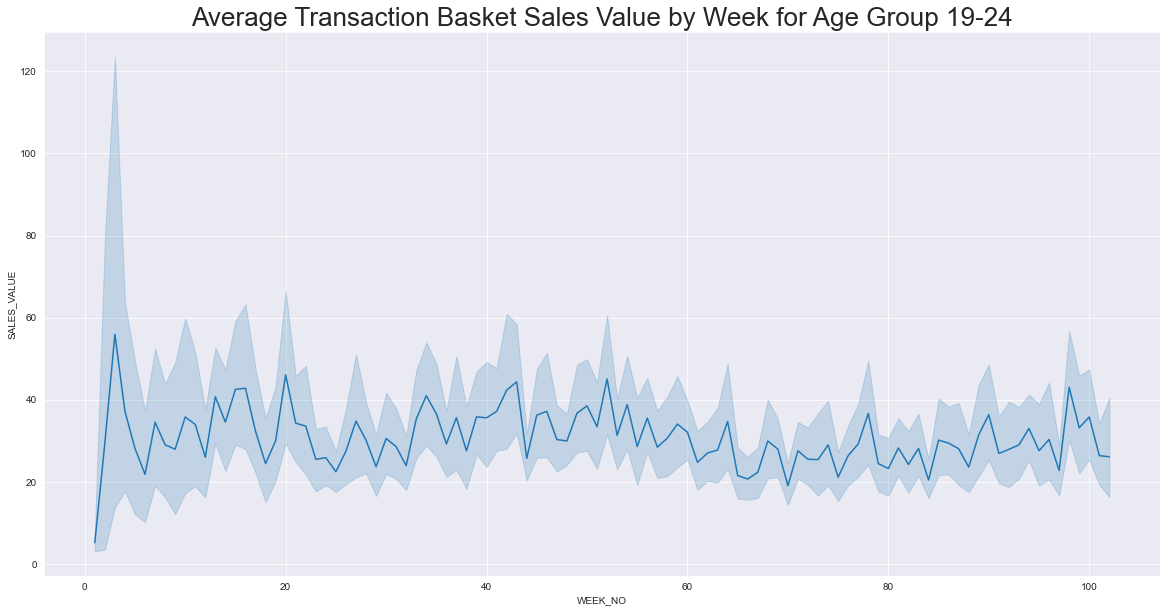

In [39]:
sns.set_style("darkgrid")

avg_weekly_sales_19_24 = age_19_24[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Age Group 19-24", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_19_24,
                  markers=True)

#### Average Transaction Basket Sales Value by Week for Income Under 15K

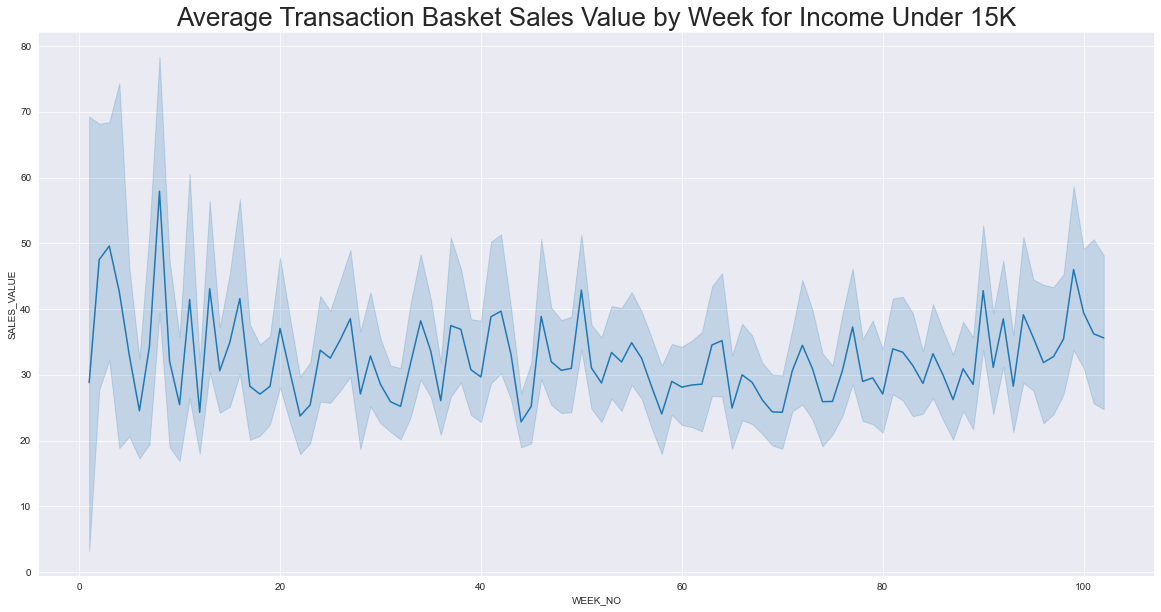

In [40]:
sns.set_style("darkgrid")

avg_weekly_sales_inc_Under_15K = inc_Under_15K[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Income Under 15K", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_inc_Under_15K,
                  markers=True)

## Box Plot

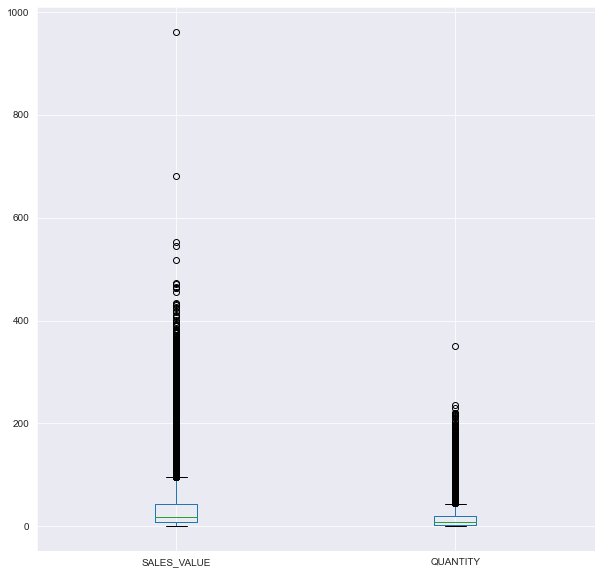

In [41]:

hh_transactions.boxplot(column = ['SALES_VALUE', 'QUANTITY'], figsize=(10,10))
plt.show()

In [42]:
features = ['DAY','SALES_VALUE', 'QUANTITY']

## Pairplot

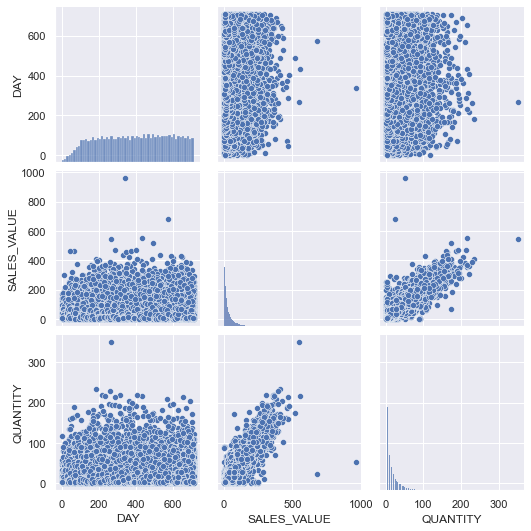

In [43]:
sns.set()
sns.pairplot(hh_transactions[features])

## Scatterplot


<AxesSubplot:xlabel='SALES_VALUE', ylabel='QUANTITY'>

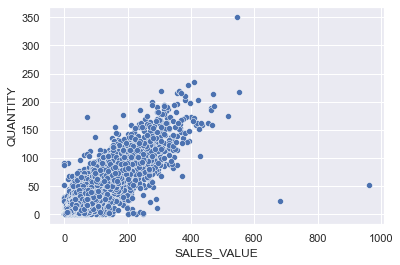

In [44]:
sns.scatterplot(data = hh_transactions, x = 'SALES_VALUE', y = 'QUANTITY')

This scatter plot shows a strong correlation between quantity and sales value.

In [45]:
# calculate Pearson's correlation
from scipy.stats import pearsonr
# calculate Pearson's correlation between SALES_VALUE and QUANTITY
corr, _ = pearsonr(hh_transactions['SALES_VALUE'], hh_transactions['QUANTITY'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.914


In [46]:
## Calculate the correlation
hh_transactions.corr()

,BASKET_ID,QUANTITY,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO
BASKET_ID,1.000000,0.008771,0.019304,0.000292,0.959857,0.052280,-0.014318,0.959801
QUANTITY,0.008771,1.000000,0.914175,0.041317,0.009666,-0.020709,-0.006076,0.009256
SALES_VALUE,0.019304,0.914175,1.000000,0.046332,0.017447,-0.005059,-0.007918,0.016939
household_key,0.000292,0.041317,0.046332,1.000000,0.003909,0.027398,0.003455,0.003808
DAY,0.959857,0.009666,0.017447,0.003909,1.000000,0.047641,-0.014213,0.999940
STORE_ID,0.052280,-0.020709,-0.005059,0.027398,0.047641,1.000000,-0.018426,0.047605
TRANS_TIME,-0.014318,-0.006076,-0.007918,0.003455,-0.014213,-0.018426,1.000000,-0.013786
WEEK_NO,0.959801,0.009256,0.016939,0.003808,0.999940,0.047605,-0.013786,1.000000


## Part 3

### Dummy Variable

Since most of our columns are categorical, we will be transforming them into
dummy variables. The dummy variables will allow use to use categorical variables
in our regression portion. We label encoded all the categorical columns.

In [47]:
from sklearn.preprocessing import LabelEncoder
ln = LabelEncoder()
hh_transactions['AgeGroups'] = ln.fit_transform(hh_transactions['AGE_DESC'])
hh_transactions['MaritalStatus'] = ln.fit_transform(hh_transactions['MARITAL_STATUS_CODE'])
hh_transactions['Income'] = ln.fit_transform(hh_transactions['INCOME_DESC'])
hh_transactions['HomeOwner'] = ln.fit_transform(hh_transactions['HOMEOWNER_DESC'])
# mapping back for HomeOwner
ln_name_mapping = dict(zip(ln.classes_, ln.transform(ln.classes_)))
print(ln_name_mapping)
hh_transactions['Composition'] = ln.fit_transform(hh_transactions['HH_COMP_DESC'])
hh_transactions['HouseholdSize'] = ln.fit_transform(hh_transactions['HOUSEHOLD_SIZE_DESC'])
hh_transactions['NumOfKids'] = ln.fit_transform(hh_transactions['KID_CATEGORY_DESC'])

{'Homeowner': 0, 'Probable Owner': 1, 'Probable Renter': 2, 'Renter': 3, 'Unknown': 4}


In [48]:
hh_transactions.head()

,BASKET_ID,QUANTITY,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AGE_DESC,MARITAL_STATUS_CODE,...,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,AgeGroups,MaritalStatus,Income,HomeOwner,Composition,HouseholdSize,NumOfKids
0,27601281299,34,78.66,1,51,436,1456,8,65+,A,...,2 Adults No Kids,2,None/Unknown,5,0,8,0,2,1,3
1,27774192959,14,41.10,1,67,436,2002,10,65+,A,...,2 Adults No Kids,2,None/Unknown,5,0,8,0,2,1,3
2,28024266849,13,26.90,1,88,436,1604,13,65+,A,...,2 Adults No Kids,2,None/Unknown,5,0,8,0,2,1,3
3,28106322445,32,63.43,1,94,436,1937,14,65+,A,...,2 Adults No Kids,2,None/Unknown,5,0,8,0,2,1,3
4,28235481967,20,53.45,1,101,436,1603,15,65+,A,...,2 Adults No Kids,2,None/Unknown,5,0,8,0,2,1,3


In [49]:
hh_transactions.columns

Index(['BASKET_ID', 'QUANTITY', 'SALES_VALUE', 'household_key', 'DAY',
       'STORE_ID', 'TRANS_TIME', 'WEEK_NO', 'AGE_DESC', 'MARITAL_STATUS_CODE',
       'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'AgeGroups', 'MaritalStatus', 'Income',
       'HomeOwner', 'Composition', 'HouseholdSize', 'NumOfKids'],
      dtype='object')

### Perform regression to predict the output

After encoding the categorical columns, we have checked the correlation of the attributes with our target variable(Sales value).Like we saw previously, we do see a high correlation between Sales value and quantity. We also see a small positive correlation with day, week and household size. Going ahead, let's perform the linear regression and plot some of these.

In [50]:
hh_transactions_save = hh_transactions

In [51]:
hh_transactions = hh_transactions.drop(columns=["BASKET_ID", "household_key"], axis=1)
hh_transactions.drop(hh_transactions[hh_transactions['SALES_VALUE'] > 200].index, inplace = True)

In [52]:
hh_transactions.corr()

,QUANTITY,SALES_VALUE,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AgeGroups,MaritalStatus,Income,HomeOwner,Composition,HouseholdSize,NumOfKids
QUANTITY,1.000000,0.907535,0.011554,-0.029086,-0.002579,0.011149,-0.022891,-0.062732,0.009621,-0.075675,-0.070248,0.086495,-0.037852
SALES_VALUE,0.907535,1.000000,0.019985,-0.014753,-0.003988,0.019471,-0.024477,-0.087741,-0.008829,-0.112469,-0.069895,0.090471,-0.031129
DAY,0.011554,0.019985,1.000000,0.047176,-0.014450,0.999940,-0.012286,-0.011277,0.004631,-0.006250,-0.002113,0.007051,-0.000611
STORE_ID,-0.029086,-0.014753,0.047176,1.000000,-0.018055,0.047148,0.050180,0.013564,-0.066931,-0.008901,-0.025944,-0.016064,-0.023648
TRANS_TIME,-0.002579,-0.003988,-0.014450,-0.018055,1.000000,-0.014025,-0.078152,0.041784,0.020276,0.036893,0.003706,-0.024663,-0.023810
WEEK_NO,0.011149,0.019471,0.999940,0.047148,-0.014025,1.000000,-0.012172,-0.011383,0.004583,-0.006214,-0.002035,0.006978,-0.000410
AgeGroups,-0.022891,-0.024477,-0.012286,0.050180,-0.078152,-0.012172,1.000000,-0.061319,-0.059473,-0.251780,0.104050,-0.093583,0.126979
MaritalStatus,-0.062732,-0.087741,-0.011277,0.013564,0.041784,-0.011383,-0.061319,1.000000,0.086716,0.439276,0.370674,-0.466601,0.213699
Income,0.009621,-0.008829,0.004631,-0.066931,0.020276,0.004583,-0.059473,0.086716,1.000000,-0.043394,0.041173,-0.061378,0.019749
HomeOwner,-0.075675,-0.112469,-0.006250,-0.008901,0.036893,-0.006214,-0.251780,0.439276,-0.043394,1.000000,0.237081,-0.285295,0.089208


The feature columns, HouseholdSize and Income, show some correlation with SALES_VALUES.

In [53]:
hh_transactions.describe()

,QUANTITY,SALES_VALUE,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AgeGroups,MaritalStatus,Income,HomeOwner,Composition,HouseholdSize,NumOfKids
count,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000,125983.000000
mean,13.838637,30.817999,392.669686,3526.449799,1549.737496,56.794036,2.484859,1.045244,6.975401,1.467492,2.352714,1.158855,2.330465
std,16.253140,35.146630,186.406811,9464.831816,416.966665,26.630177,1.255727,0.926101,3.246239,1.842048,1.374665,1.167566,1.117179
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,6.970000,235.000000,330.000000,1252.000000,34.000000,2.000000,0.000000,6.000000,0.000000,1.000000,0.000000,2.000000
50%,7.000000,17.660000,399.000000,372.000000,1611.000000,58.000000,3.000000,1.000000,8.000000,0.000000,2.000000,1.000000,3.000000
75%,18.000000,41.140000,553.000000,427.000000,1844.000000,80.000000,3.000000,2.000000,9.000000,4.000000,3.000000,2.000000,3.000000
max,177.000000,199.990000,711.000000,34280.000000,2359.000000,102.000000,5.000000,2.000000,11.000000,4.000000,5.000000,4.000000,3.000000


We observe that when we train the model with 8 attributes we achieve an R squared of 0.8403.

In [54]:
y = hh_transactions['SALES_VALUE']
X = hh_transactions[['QUANTITY','AgeGroups','MaritalStatus','Income','HomeOwner','Composition','HouseholdSize','NumOfKids']].values.reshape(-1,8)

# split the input into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

# measure the coefficient of determination (R2 score)
score = r2_score(y_test, y_pred)
print(score)

0.8294763047395358


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SALES_VALUE'>

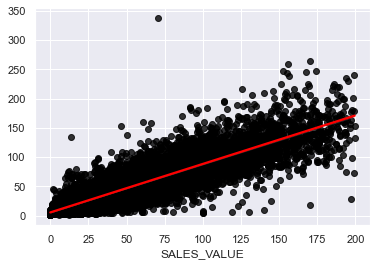

In [55]:
sns.regplot(y_test,y_pred, scatter_kws={"color":"black"}, line_kws={"color":"red"})

#### Plot Summary
Using the plot above, we can see that our model fits decently with the
test data

#### Model summary
The model summary contains lots of important value we can use to evaluate our model

In [56]:
import statsmodels
import statsmodels.api as sm

X = hh_transactions[['QUANTITY','AgeGroups','MaritalStatus','Income','HomeOwner','Composition','HouseholdSize','NumOfKids']].values.reshape(-1,8)
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(hh_transactions['SALES_VALUE'], X).fit()
print(olsmod.summary())



                            OLS Regression Results                            
Dep. Variable:            SALES_VALUE   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 7.500e+04
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:40:31   Log-Likelihood:            -5.1687e+05
No. Observations:              125983   AIC:                         1.034e+06
Df Residuals:                  125974   BIC:                         1.034e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4813      0.245     30.567      0.0

#### Linearity
In our case since we have multiple independent variables, we use a scatter plot to see our predicted values versus the actual values.The scatter plots show that the points are evenly spread around the diagonal line, so we can assume that there is linear relationship between our independent and dependent variables. We can also observe that this scatter plot is very similar to the correlation scatter plot between Sales Value and Quantity.

In [57]:
hh_transactions['SalesValue_Pred'] = olsmod.predict(X)
hh_transactions['SalesValue_residual'] = olsmod.resid

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


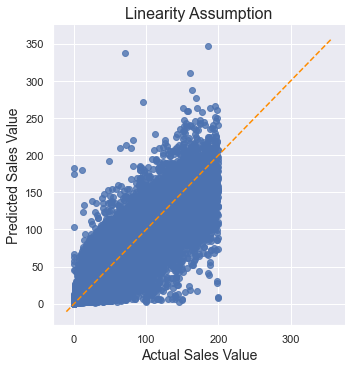

In [58]:
# Plotting the observed vs predicted values
sns.lmplot(x='SALES_VALUE', y='SalesValue_Pred', data=hh_transactions, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(hh_transactions[['SALES_VALUE', 'SalesValue_Pred']].min().min()-10, 
                        hh_transactions[['SALES_VALUE', 'SalesValue_Pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('Predicted Sales Value', fontsize=14)
plt.xlabel('Actual Sales Value', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

#### Multicollinearity
The simulation result tells us that even if the model is good at predicting the response variable given features (high R-squared), linear model is not robust enough to fully understand the effect of individual features on the response variable.This is because some of the attributes like household size, household composition and number of kids shows strong linear correlation with one another, as shown in the below spearnman's correlation matrix.

/var/folders/7c/s_44qy7x2xl31y_8nm69xyg80000gn/T/ipykernel_56065/1967002020.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


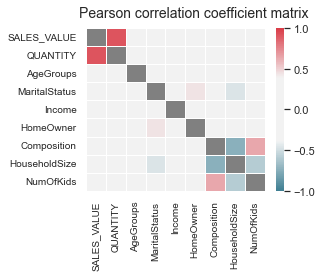

In [59]:
corr = hh_transactions[['SALES_VALUE','QUANTITY','AgeGroups','MaritalStatus','Income','HomeOwner','Composition','HouseholdSize','NumOfKids']].corr()

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=np.bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)

When more than two features are used for prediction, you must consider the possibility of each features interacting with one another.When using linear regression coefficients, we must remove the effect of multicollinearity to obtain reliable regression coefficients. But multicollinearity does not affect prediction accuracy.While the values of individual coefficients may be unreliable, it does not undermine the prediction power of the model.

## Part 4

## Clustering

### Agglomerative Clustering

In [60]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [61]:
hh_transactions.columns

Index(['QUANTITY', 'SALES_VALUE', 'DAY', 'STORE_ID', 'TRANS_TIME', 'WEEK_NO',
       'AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'AgeGroups',
       'MaritalStatus', 'Income', 'HomeOwner', 'Composition', 'HouseholdSize',
       'NumOfKids', 'SalesValue_Pred', 'SalesValue_residual'],
      dtype='object')

In [62]:
hh_transactions['AgeGroups'].value_counts()

3    46310
2    32417
1    20039
5    10611
4     9048
0     7558
Name: AgeGroups, dtype: int64

In [63]:
percent_df = hh_transactions['AgeGroups'].value_counts()/hh_transactions.shape[0]*100
percent_df

3    36.758928
2    25.731249
1    15.906114
5     8.422565
4     7.181921
0     5.999222
Name: AgeGroups, dtype: float64

In [64]:
df_split = hh_transactions.sample(n=1000,random_state=200)
df_split.reset_index()

,index,QUANTITY,SALES_VALUE,DAY,STORE_ID,TRANS_TIME,WEEK_NO,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,...,KID_CATEGORY_DESC,AgeGroups,MaritalStatus,Income,HomeOwner,Composition,HouseholdSize,NumOfKids,SalesValue_Pred,SalesValue_residual
0,107031,3,5.93,460,422,1357,66,35-44,A,Under 15K,...,1,2,0,11,0,0,2,0,9.860073,-3.930073
1,66063,35,123.51,519,367,2203,75,65+,U,50-74K,...,None/Unknown,5,2,9,0,4,0,3,71.612509,51.897491
2,97422,5,14.30,71,32004,1744,11,65+,U,15-24K,...,None/Unknown,5,2,2,4,3,0,3,10.813511,3.486489
3,31557,6,25.03,340,381,1158,49,45-54,A,35-49K,...,1,3,0,8,0,1,2,0,16.008850,9.021150
4,24694,10,11.00,270,338,1307,39,55-64,U,150-174K,...,None/Unknown,4,2,3,4,3,0,3,20.909809,-9.909809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,77132,4,20.18,78,410,1802,12,45-54,U,15-24K,...,None/Unknown,3,2,2,2,5,0,3,12.046739,8.133261
996,40846,12,23.18,603,359,2114,87,45-54,U,50-74K,...,None/Unknown,3,2,9,0,5,0,3,27.923695,-4.743695
997,27909,7,18.48,709,382,1509,102,19-24,U,35-49K,...,None/Unknown,0,2,8,4,2,1,3,15.929358,2.550642
998,47640,3,1.36,206,330,1855,30,35-44,A,35-49K,...,None/Unknown,2,0,8,0,2,1,3,11.674392,-10.314392


In [65]:
df_split['AgeGroups'].value_counts()

3    356
2    271
1    143
5     87
0     73
4     70
Name: AgeGroups, dtype: int64

In [66]:
splitpercent_df = df_split['AgeGroups'].value_counts()/df_split.shape[0]*100
splitpercent_df

3    35.6
2    27.1
1    14.3
5     8.7
0     7.3
4     7.0
Name: AgeGroups, dtype: float64

In [67]:
X = df_split[['AgeGroups','SALES_VALUE','Income']]

Agglomerative Clustering

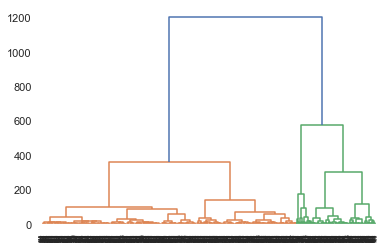

In [68]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [69]:
from sklearn.decomposition import PCA
pca_ag = PCA()

pca_ag.fit(X)
pca_ag.explained_variance_ratio_

array([0.98898226, 0.00953118, 0.00148657])

In [70]:
pca_ag = PCA(n_components = 3)
pca_ag.fit(X)
cluster_pca_ag = pca_ag.transform(X)

In [71]:
model = AgglomerativeClustering(n_clusters= 3, affinity='euclidean', linkage='ward')
model.fit(cluster_pca_ag)
labels = model.labels_
labels

array([0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1,
       0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,

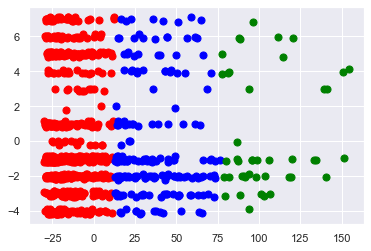

In [72]:
# Some issue with this code
plt.scatter(cluster_pca_ag[labels==0, 0], cluster_pca_ag[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(cluster_pca_ag[labels==1, 0], cluster_pca_ag[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(cluster_pca_ag[labels==2, 0], cluster_pca_ag[labels==2, 1], s=50, marker='o', color='green')
#plt.scatter(X[labels==3, 0].to_numpy(), X[labels==3, 1].to_numpy(), s=50, marker='o', color='purple')
#plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

### K-Means clustering

In [73]:
from sklearn.cluster import KMeans

cluster_variables = hh_transactions_save[['SALES_VALUE','QUANTITY','AgeGroups','MaritalStatus','Income','HomeOwner','Composition','HouseholdSize','NumOfKids']]

pca = PCA()

pca.fit(cluster_variables)
pca.explained_variance_ratio_


array([9.65985192e-01, 2.33867660e-02, 5.40267698e-03, 2.32003635e-03,
       1.48307374e-03, 6.45329715e-04, 3.27386329e-04, 2.57094432e-04,
       1.92444253e-04])

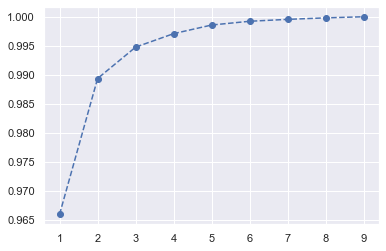

In [74]:
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle='--')

In [75]:
pca = PCA(n_components = 3)
pca.fit(cluster_variables)
cluster_pca = pca.transform(cluster_variables)
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_pca.fit(cluster_pca)
df_pca_kmeans = pd.concat([cluster_variables.reset_index(drop=True), pd.DataFrame(cluster_pca)], axis = 1)
df_pca_kmeans.columns.values[-3:] = ['Component 1', "Component 2", "Component 3"]
df_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_pca_kmeans['Segment'] = df_pca_kmeans['Segment K-means PCA'].map({0:'first', 1:'second', 2:'third'})
df_pca_kmeans.head()

,SALES_VALUE,QUANTITY,AgeGroups,MaritalStatus,Income,HomeOwner,Composition,HouseholdSize,NumOfKids,Component 1,Component 2,Component 3,Segment K-means PCA,Segment
0,78.66,34,5,0,8,0,2,1,3,50.175667,0.079253,1.024700,2,third
1,41.10,14,5,0,8,0,2,1,3,7.788850,3.828757,1.092039,2,third
2,26.90,13,5,0,8,0,2,1,3,-5.674188,-0.790731,0.957662,0,first
3,63.43,32,5,0,8,0,2,1,3,35.373961,-4.021945,0.903170,2,third
4,53.45,20,5,0,8,0,2,1,3,21.500990,3.126008,1.083933,2,third


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Component 2', ylabel='Component 1'>

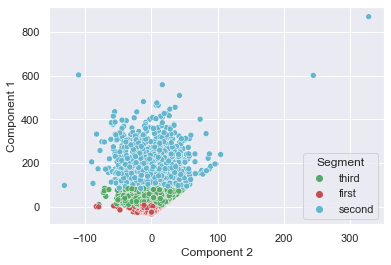

In [76]:
x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['Segment'], palette = ['g', 'r', 'c'])


### Mini-batch k-means clustering

In [77]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import euclidean_distances
import time
import pylab as pl

In [78]:
mbk = MiniBatchKMeans(n_clusters=3, random_state=0, batch_size=100)
t0 = time.time()
mbk.fit(cluster_pca)
t_mini_batch = time.time() - t0
mbk_means_labels = mbk.labels_
mbk_means_cluster_centers = mbk.cluster_centers_
mbk_means_labels_unique = np.unique(mbk_means_labels)

Text(-3.5, 1.8, 'train time: 0.02s\ninertia: 50083020.813307')

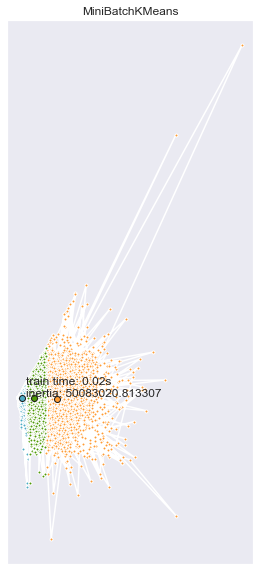

In [79]:
fig = pl.figure(figsize=(15, 10))
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

distance = euclidean_distances(mbk_means_cluster_centers,
                               squared=True)
order = distance.argmin(axis=1)

ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(3), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(cluster_pca[my_members, 0], cluster_pca[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
                                    markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
pl.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
        (t_mini_batch, mbk.inertia_))

### Mean-shift clustering

In [80]:
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D

In [81]:
X_num = X.to_numpy()
ms = MeanShift()
ms.fit(X_num)
cluster_centers = ms.cluster_centers_

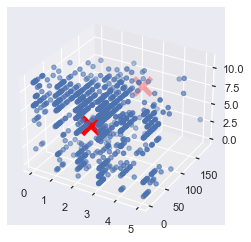

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_num[:,0], X_num[:,1], X_num[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5, zorder=10)
plt.show()

In [84]:
P = ms.predict(X_num)

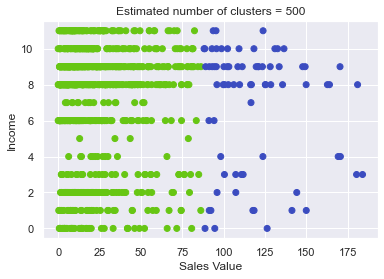

In [91]:
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426' if x == 2 else '#67c614', P))
plt.scatter(X_num[:,1], X_num[:,2], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {500}')
plt.xlabel('Sales Value')
plt.ylabel('Income')
plt.show()

## Summary

We conducted the following 4 types of clustering on our dataset:
1. Agglomerative
2. K means
3. Mini batch K means
4. Mean shift clustering

We see that out of the 4, Kmeans and mini batch kmeans give similar as well as good results. In case of agglomerative and mean shift, we see that the data is not clustered well. 

## Classification

### Applying Support Vector Machine (SVM)

We take 1000 samples out of the dataset as SVM only works well with few instances

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df_split = hh_transactions_save.sample(n=1000,random_state=250)

X = df_split[['SALES_VALUE','QUANTITY','AgeGroups','MaritalStatus','Income','Composition','HouseholdSize','NumOfKids']]
X_train, X_test, y_train, y_test = train_test_split(X, df_split['HomeOwner'], random_state = 0)

clf = SVC(kernel="linear").fit(X_train, y_train)
y_pred = clf.predict(X_test)

result_metrics = classification_report(y_test, y_pred, target_names=['Homeowner', 'Probable Owner', 'Probable Renter', 'Renter','Unknown'])
print(result_metrics)

                 precision    recall  f1-score   support

      Homeowner       0.82      0.82      0.82       162
 Probable Owner       0.00      0.00      0.00         3
Probable Renter       0.00      0.00      0.00         2
         Renter       0.00      0.00      0.00        12
        Unknown       0.66      0.80      0.72        71

       accuracy                           0.76       250
      macro avg       0.29      0.32      0.31       250
   weighted avg       0.71      0.76      0.74       250



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying Logistic Regression

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = df_split[['SALES_VALUE','QUANTITY','AgeGroups','MaritalStatus','Income','Composition','HouseholdSize','NumOfKids']]
X_train, X_test, y_train, y_test = train_test_split(X, df_split['HomeOwner'], test_size = 0.25, random_state = 0)

# scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
result_metrics = classification_report(y_test, y_pred, target_names=['Homeowner', 'Probable Owner', 'Probable Renter', 'Renter','Unknown'])
print(result_metrics)

                 precision    recall  f1-score   support

      Homeowner       0.80      0.83      0.82       162
 Probable Owner       0.00      0.00      0.00         3
Probable Renter       0.00      0.00      0.00         2
         Renter       0.50      0.08      0.14        12
        Unknown       0.66      0.73      0.69        71

       accuracy                           0.75       250
      macro avg       0.39      0.33      0.33       250
   weighted avg       0.73      0.75      0.73       250



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Applying Decision Trees

In [95]:
import os
from sklearn.tree import DecisionTreeClassifier

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


X = df_split[['SALES_VALUE','QUANTITY','AgeGroups','MaritalStatus','Income','Composition','HouseholdSize','NumOfKids']]
y = df_split['HomeOwner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [96]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Homeowner', 'Probable Owner', 'Probable Renter', 'Renter','Unknown']))

                 precision    recall  f1-score   support

      Homeowner       0.69      0.89      0.78       186
 Probable Owner       0.00      0.00      0.00         3
Probable Renter       0.00      0.00      0.00         5
         Renter       0.00      0.00      0.00        18
        Unknown       0.64      0.44      0.52        88

       accuracy                           0.68       300
      macro avg       0.27      0.27      0.26       300
   weighted avg       0.62      0.68      0.63       300



/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


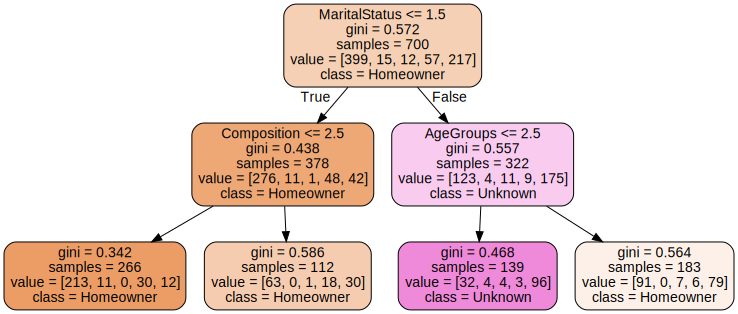

In [97]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "project_decisiontree.dot"),
        feature_names=['SALES_VALUE','QUANTITY','AgeGroups','MaritalStatus','Income','Composition','HouseholdSize','NumOfKids'],
        class_names=['Homeowner', 'Probable Owner', 'Probable Renter', 'Renter','Unknown'],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "project_decisiontree.dot"))

## KNN Classification for HomeOwner

In [98]:

from sklearn.neighbors import KNeighborsClassifier

classification_variables = hh_transactions_save[['SALES_VALUE','AgeGroups','MaritalStatus','Income','HomeOwner','HouseholdSize','NumOfKids', 'QUANTITY']]

X = classification_variables[['SALES_VALUE','Income','HouseholdSize','NumOfKids', 'QUANTITY']]
y = classification_variables[['HomeOwner']]

classification_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126922 entries, 0 to 126921
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SALES_VALUE    126922 non-null  float64
 1   AgeGroups      126922 non-null  int64  
 2   MaritalStatus  126922 non-null  int64  
 3   Income         126922 non-null  int64  
 4   HomeOwner      126922 non-null  int64  
 5   HouseholdSize  126922 non-null  int64  
 6   NumOfKids      126922 non-null  int64  
 7   QUANTITY       126922 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 12.7 MB


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=178)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=178)

In [100]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79     18857
           1       0.80      0.33      0.47       580
           2       0.46      0.06      0.10       578
           3       0.63      0.23      0.34      2016
           4       0.60      0.55      0.58      9700

    accuracy                           0.70     31731
   macro avg       0.65      0.41      0.46     31731
weighted avg       0.69      0.70      0.68     31731



## KNN For Income Level

In [101]:

from sklearn.neighbors import KNeighborsClassifier

classification_variables = hh_transactions_save[['SALES_VALUE','AgeGroups','MaritalStatus','Income','HomeOwner','HouseholdSize','NumOfKids', 'QUANTITY', 'Composition']]

X = classification_variables[['SALES_VALUE','AgeGroups','MaritalStatus','HomeOwner','HouseholdSize','NumOfKids', 'QUANTITY', 'Composition']]
y = classification_variables[['Income']]

classification_variables.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 126922 entries, 0 to 126921
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SALES_VALUE    126922 non-null  float64
 1   AgeGroups      126922 non-null  int64  
 2   MaritalStatus  126922 non-null  int64  
 3   Income         126922 non-null  int64  
 4   HomeOwner      126922 non-null  int64  
 5   HouseholdSize  126922 non-null  int64  
 6   NumOfKids      126922 non-null  int64  
 7   QUANTITY       126922 non-null  int64  
 8   Composition    126922 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 13.7 MB


In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=178)
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=178)

In [103]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.37      0.45      1438
           1       0.54      0.43      0.48      1664
           2       0.58      0.38      0.46      2852
           3       0.39      0.24      0.30      1062
           4       0.71      0.29      0.41       446
           5       0.55      0.21      0.30       125
           6       0.61      0.52      0.56      3519
           7       0.40      0.21      0.28       555
           8       0.53      0.67      0.59      6787
           9       0.51      0.70      0.59      7342
          10       0.41      0.32      0.36      3126
          11       0.61      0.51      0.56      2815

    accuracy                           0.53     31731
   macro avg       0.53      0.40      0.44     31731
weighted avg       0.53      0.53      0.52     31731



The accuracy is only 53% using the empirical method. Let's see if
it can be improved by tweaking the K value.


In [104]:
error_rate = []

for i in range(1,60):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train.values.ravel())
  y_pred = knn.predict(X_test)
  y_pred = y_pred.reshape(31731, 1)
  error_rate.append(np.mean(y_test != y_pred))


Text(0, 0.5, 'Error Rate')

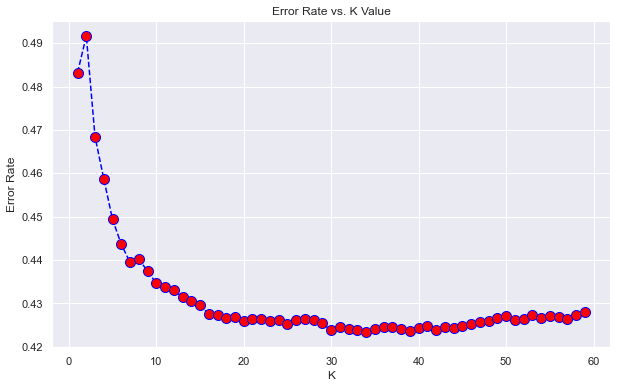

In [105]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

From the graph, we can see that when K = 30, we have the lowest error rate 

In [106]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train.values.ravel())

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.51      0.55      1438
           1       0.54      0.53      0.54      1664
           2       0.61      0.46      0.52      2852
           3       0.45      0.34      0.39      1062
           4       0.58      0.46      0.51       446
           5       0.68      0.22      0.33       125
           6       0.64      0.59      0.61      3519
           7       0.33      0.29      0.31       555
           8       0.58      0.68      0.63      6787
           9       0.57      0.69      0.62      7342
          10       0.46      0.38      0.42      3126
          11       0.69      0.59      0.64      2815

    accuracy                           0.58     31731
   macro avg       0.56      0.48      0.51     31731
weighted avg       0.58      0.58      0.57     31731



With K = 60, we have a 58% accuracy.

## Summary